In [65]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [66]:
X=[]
file=open('Iris.data','r')
for line in file:
    temp=list(line.split(','))
    for i in range(4):
        temp[i]=float(temp[i])
    if(temp[4]=='Iris-setosa\n'):
        temp[4]=2
    elif(temp[4]=='Iris-virginica\n'):
        temp[4]=1
    else:
        temp[4]=0
    X.append(temp)
random.shuffle(X)
Xtrain=np.matrix(X[:int(len(X)*0.7)])
Xtest=np.matrix(X[int(len(X)*0.7):])

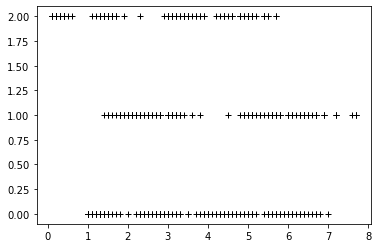

In [67]:
plt.plot(Xtrain[:,:4],Xtrain[:,4],'k+')

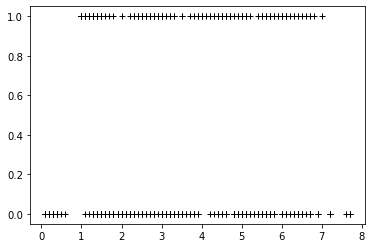

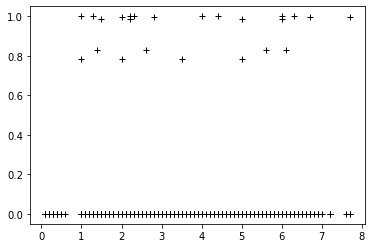

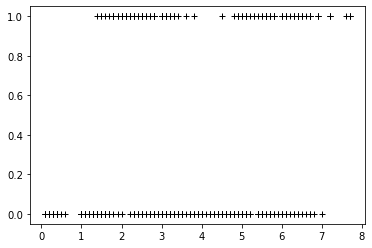

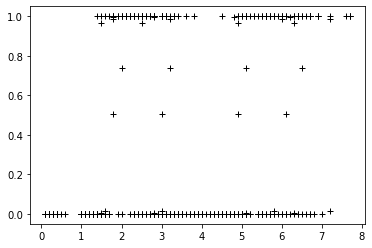

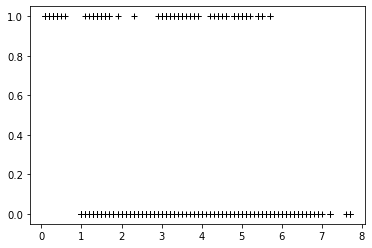

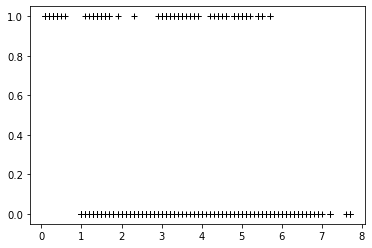

[matrix([[  46.8903678 ],
        [ -78.08703609],
        [  31.37958203],
        [-111.3976396 ]]), matrix([[-18.53704794],
        [-50.71396161],
        [ 31.62685909],
        [ 61.25467846]]), matrix([[  2.84671155],
        [ 11.1132432 ],
        [-18.64131508],
        [ -7.62541985]])]


In [68]:
alpha=5
m=len(Xtrain)
theta=[[],[],[]]
for i in range(3):
    y=[]
    for j in range(len(Xtrain)):
        if Xtrain[j,4]==i:
            y.append(1)
        else:
            y.append(0)
    y=np.matrix(y).transpose()
    theta[i]=np.matrix(np.ones((Xtrain[0].size-1,1)))
    #theta[i]=np.multiply(theta[i],10)
    for j in range(100000):
        z=np.matrix(Xtrain[:,:4]*theta[i])
        hx=1/(1+np.exp(-z))
        theta[i]=theta[i]-((alpha/m)*Xtrain[:,:4].transpose()*(hx-y))
#     for j in range(len(y)):
#         print(hx[j],y[j])
#     print('line')
    plt.plot(Xtrain[:,:4],y,'k+')
    plt.show()
    plt.plot(Xtrain[:,:4],hx,'k+')
    plt.show()
print(theta)

error percentage: 4.444444444444445
accuracy percentage95.55555555555556


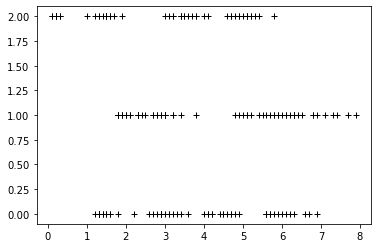

In [71]:
y=[-1]*len(Xtest)
for i in range(3):
    z=np.matrix(Xtest[:,:4]*theta[i])
    hx=(1/(1+np.exp(-z)))
    hx=np.array(hx)
    for j in range(len(Xtest)):
        if (hx[j][0])>0.05:
            y[j]=i
error=0
for j in range(len(Xtest)):
    if y[j]==-1:
        y[j]=0
    if(y[j]!=Xtest[j,4]):
        error+=1 
print("error percentage: "+str((error/len(Xtest))*100))
print("accuracy percentage"+str(100-(error/len(Xtest))*100))
plt.plot(Xtest[:,:4],Xtest[:,4],'k+')
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression
logrej=LogisticRegression()
#logrej.score(Xtest[:,:4],Xtest[:,4])
logrej.fit(Xtrain[:,:4],Xtrain[:,4])
print("accuracy by inbuilt function:"+str(logrej.score(Xtest[:,:4],Xtest[:,4])*100))

accuracy by inbuilt function:97.77777777777777


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
